# Chapter 03 3차원 세계로의 도약

## 3.1 3차원 공간에서 벡터 그리기

In [1]:
%load_ext autoreload
%autoreload 2
from draw3d import *

### 3.1.2 파이썬으로 3차원 그림 그리기

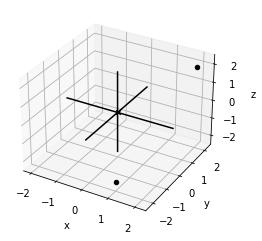

In [2]:
draw3d(
    Points3D((2,2,2), (1,-2,-2))
)

C:\Users\lhk65\OneDrive\Desktop\Project\Math-for-Programmers\Part 1\Chapter 03\draw3d.py:19: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


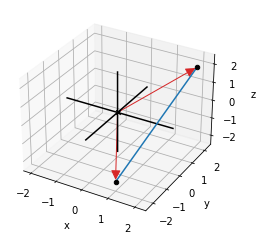

In [3]:
draw3d(
    Points3D((2,2,2),(1,-2,-2)),
    Arrow3D((2,2,2)),
    Arrow3D((1,-2,-2)),
    Segment3D((2,2,2),(1,-2,-2))
)

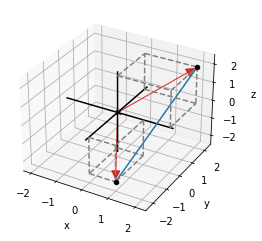

In [4]:
draw3d(
    Points3D((2,2,2),(1,-2,-2)),
    Arrow3D((2,2,2)),
    Arrow3D((1,-2,-2)),
    Segment3D((2,2,2), (1,-2,-2)),
    Box3D(2,2,2),
    Box3D(1,-2,-2)
)

### 3.1.3 연습문제

### 연습문제 3.1
#### 좌표 (-1,2,2)를 나타내는 3차원 화살표와 점을 그리고, 화살표를 3차원처럼 보이게 하는 점선 박스도 그려라. 이 그림은 연습 차원에서 손으로 그려보아야 한다. 향후 3차원 그림은 파이썬으로 그릴 것이다.

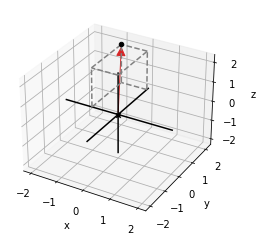

In [5]:
draw3d(
    Points3D((-1,2,2)),
    Arrow3D((-1,2,2)),
    Box3D(-1,2,2)
)

### 연습문제 3.2 (Mini-project)
#### 각 좌표가 +1 또는 -1인 3차원 벡터는 총 8가지가 있다. 한 가지 예는 (1,-1,1)이다. 8개의 벡터를 점으로 프로팅하라. 그런 다음 Segment3D 객체를 사용해 정육면체의 외곽선을 형성하도록 점들을 선분으로 연결할 방법을 생각해보자.

In [6]:
pm1 = [1,-1]

In [7]:
verticles = [(x,y,z) for x in pm1 for y in pm1 for z in pm1]

In [8]:
edges = [((-1,y,z),(1,y,z)) for y in pm1 for z in pm1] +\
            [((x,-1,z),(x,1,z)) for x in pm1 for z in pm1] +\
            [((x,y,-1),(x,y,1)) for x in pm1 for y in pm1]

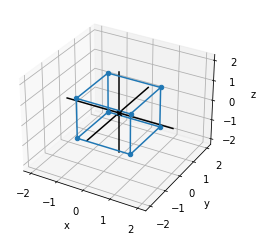

In [9]:
draw3d(
    Points3D(*verticles, color=blue),
    *[Segment3D(*edge) for edge in edges]
)

## 3.2 3차원에서의 벡터 산술

### 3.2.1 3차원 벡터 더하기

In [10]:
def add(*vectors):
    by_coordinate = zip(*vectors)
    corrdinate_sums = [sum(coords) for coords in by_coordinate]
    return tuple(coordinate_sums)

In [11]:
list(zip(*[(1,1,3),(2,4,-4),(4,2,-2)]))

[(1, 2, 4), (1, 4, 2), (3, -4, -2)]

In [12]:
[sum(coords) for coords in [(1,2,4), (1,4,2), (3,-4,-2)]]

[7, 7, -3]

In [13]:
def add(*vectors):
    return tuple(map(sum,zip(*vectors)))

In [14]:
from math import sqrt
def length(v):
    return sqrt(sum([coord ** 2 for coord in v]))

In [15]:
length((3,4,12))

13.0

### 3.2.6 연습문제

### 연습문제 3.3
#### 두 벡터 (4,0,3)과 (-1,0,1)을 Arrow3D 객체로 그리되, 두 벡터를 3차원 상에서 삼각형법으로 가능한 두 가지 순서대로 배치해 그려라. 그리고 벡터합을 구하라.

In [16]:
add((4,0,3),(-1,0,1))

(3, 0, 4)

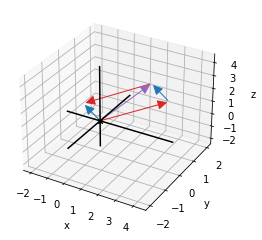

In [17]:
draw3d(
    Arrow3D((4,0,3), color=red),
    Arrow3D((-1,0,1), color=blue),
    Arrow3D((3,0,4),(4,0,3), color=blue),
    Arrow3D((-1,0,1),(3,0,4), color=red),
    Arrow3D((3,0,4), color=purple)
)

### 연습문제 3.4
#### vectors1=[(1,2,3,4,5),(6,7,8,9,10)]과 vectors2=[(1,2),(3,4),(5,6)]이라고 설정했다고 하자. 파이썬에서 계산하지 않고 zip(\*vectors1)과 zip(\*vectors2)의 결과로 얻는 튜플의 개수를 각각 구하라.

In [18]:
vectors1=[(1,2,3,4,5), (6,7,8,9,10)]

In [19]:
vectors2=[(1,2), (3,4), (5,6)]

In [20]:
len(list(zip(*vectors1)))

5

In [21]:
len(list(zip(*vectors2)))

2

### 연습문제 3.5 (Mini-project)
#### 다음 리스트 컴프리헨션은 24개의 파이썬 벡터로 이루어진 리스트를 만든다.
<pre>
<code>
from math import sin, cos, pi
vs = [(sin(pi*t/6), cos(pi*t/6), 1.0/3) for t in range(0,24)]
</code>
</pre>
#### 이 24개 벡터의 합을 구하라. Arrow3D 객체로 삼각형법을 사용해 24개 벡터 모두를 그려라.

(-4.440892098500626e-16, -7.771561172376096e-16, 7.9999999999999964)


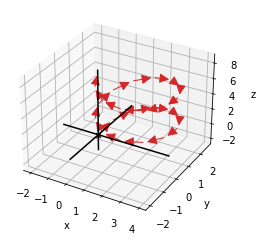

In [22]:
from math import sin, cos, pi
vs = [(sin(pi*t/6), cos(pi*t/6), 1.0/3) for t in range(0,24)]

running_sum = (0,0,0) #<1>
arrows = []
for v in vs:
    next_sum = add(running_sum, v) #2
    arrows.append(Arrow3D(next_sum, running_sum)) 
    running_sum = next_sum
print(running_sum)
draw3d(*arrows)

### 연습문제 3.6
#### 입력으로 주어진 스칼라값과 벡터를 곱해서 리턴하는 함수 scale(scalar,vector)를 작성하라. 특히, 2차원이든 3차원이든 좌표가 몇 개든 상관없이 동작하도록 작성하라.

In [23]:
def scale(scalar,v):
    return tuple(scalar * coord for coord in v)

### 연습문제 3.7
#### $u$ = (1,-1,-1)과 $v$ = (0,0,2)라고 할 때, $u + \frac{1}{2} \cdot (v-u)$를 구하라.

#### <center> $(v - u) = (0-1,0-(-1),2-(-1)) = (-1,1,3)$ </center>
#### <center> $\frac{1}{2} \cdot (v-u) = (-\frac{1}{2},\frac{1}{2},\frac{3}{2})$ </center>
#### <center> $u + \frac{1}{2} \cdot (v-u) = (\frac{1}{2},-\frac{1}{2},\frac{1}{2})$ </center>
#### <center> $u + \frac{1}{2} \cdot (v-u)$는 점 $u$와 점 $v$ 사이의 종점이다. </center>

### 연습문제 3.8
#### 2차원 벡터 (1,1)의 길이와 3차원 벡터 (1,1,1)의 길이를 각가 구하라. 4차원 벡터는 좌푯값이 4개가 있는 벡터다. 추측하는 수밖에 없겠으나, 좌표가 (1,1,1,1)인 4차원 벡터의 길이를 구하라. 코드를 사용하지 않고 이 연습문제의 답을 찾은 뒤 검산하라.

#### (1,1)의 길이는 $\sqrt{1^2+1^2} = \sqrt{2}$ 이고 (1,1,1)의 길이는 $\sqrt{1^2+1^2+1^2} = \sqrt{3}$이다. 이와 같은 방법으로 고차원 벡터에 대한 거리 공식도 동일한 방법으로 구하면 $\sqrt{1^2+1^2+1^2+1^2} = \sqrt{4} = 2$이다.

### 연습문제 3.9 (Mini-project)
#### 세 수가 3, 4, 12인 벡터는 각가의 수가 어느 좌표이든 길이가 13으로 자연수인 벡터를 이룬다. 이는 특이한 결과인데, 수는 대부분 완전제곱수(perfect square number)가 아니기 때문에 길이 공식에서 등장하는 제곱근은 보통 무리수를 리턴한다. 길이가 자연수인 벡터의 좌표를 이루는 세 개의 튜플을 하나 구하라.

In [24]:
def vectors_with_whole_number_length(max_coord=100):
    for x in range(1,max_coord):
        for y in range(1,x+1):
            for z in range(1,y+1):
                if length((x,y,z)).is_integer():
                    yield (x,y,z)

In [25]:
list(vectors_with_whole_number_length())

[(2, 2, 1),
 (4, 4, 2),
 (6, 3, 2),
 (6, 6, 3),
 (7, 4, 4),
 (7, 6, 6),
 (8, 4, 1),
 (8, 8, 4),
 (9, 6, 2),
 (10, 10, 5),
 (11, 10, 2),
 (12, 4, 3),
 (12, 6, 4),
 (12, 9, 8),
 (12, 12, 1),
 (12, 12, 6),
 (14, 5, 2),
 (14, 8, 8),
 (14, 12, 12),
 (14, 14, 7),
 (15, 10, 6),
 (16, 8, 2),
 (16, 11, 8),
 (16, 13, 4),
 (16, 15, 12),
 (16, 16, 8),
 (17, 6, 6),
 (18, 6, 1),
 (18, 9, 6),
 (18, 12, 4),
 (18, 13, 6),
 (18, 14, 3),
 (18, 18, 9),
 (19, 8, 4),
 (20, 5, 4),
 (20, 12, 9),
 (20, 20, 10),
 (20, 20, 17),
 (21, 12, 12),
 (21, 16, 12),
 (21, 18, 14),
 (21, 18, 18),
 (22, 6, 3),
 (22, 14, 7),
 (22, 20, 4),
 (22, 21, 6),
 (22, 22, 11),
 (23, 10, 10),
 (23, 14, 2),
 (24, 8, 6),
 (24, 12, 3),
 (24, 12, 8),
 (24, 12, 11),
 (24, 16, 3),
 (24, 18, 16),
 (24, 24, 2),
 (24, 24, 12),
 (24, 24, 23),
 (25, 10, 2),
 (25, 20, 8),
 (26, 7, 2),
 (26, 18, 15),
 (26, 22, 19),
 (26, 26, 13),
 (27, 14, 6),
 (27, 18, 6),
 (27, 24, 8),
 (28, 10, 4),
 (28, 16, 7),
 (28, 16, 16),
 (28, 17, 4),
 (28, 21, 12),
 (28,

### 연습문제 3.10
#### (-1,-1,2)와 같은 방향이지만 길이가 1인 벡터를 구하라.

In [26]:
length((-1,-1,2))

2.449489742783178

In [27]:
s = 1/length((-1,-1,2))

In [28]:
scale(s,(-1,-1,2))

(-0.4082482904638631, -0.4082482904638631, 0.8164965809277261)

In [29]:
length(scale(s,(-1,-1,2)))

1.0

### 3.3.2 내적 계산하기

In [30]:
def dot(u,v):
    return sum([coord1 * coord2 for coord1,coord2 in zip(u,v)])

In [31]:
dot((1,0),(0,2))

0

In [32]:
dot((0,3,0),(0,0,-5))

0

In [33]:
dot((3,4),(2,3))

18

In [34]:
dot(scale(2,(3,4)),(2,3))

36

In [35]:
dot((3,4),scale(2,(2,3)))

36

In [36]:
dot((4,3),(8,6))

50

### 3.3.4 내적으로 각 측정하기

In [37]:
from math import cos,pi
3 * 2 * cos(75 * pi/180)

1.5529142706151244

In [38]:
def angle_between(v1,v2):
    return acos(
                dot(v1,v2) /
                (length(v1) * length(v2))
            )

### 3.3.5 연습문제

### 연습문제 3.11
#### 다음 그림을 바탕으로 $u \cdot v$, $u \cdot w$, $v \cdot w$의 대소를 비교하라.

#### $u \cdot v > v \cdot w > u \cdot w$

### 연습문제 3.12
#### (-1,-1,1)과 (1,2,1)의 내적을 구하라. 이 두 3차원 벡터의 사잇각은 90$^\circ$보다 큰가? 작은가? 또는 정확히 90$^\circ$인가?

In [39]:
dot((-1,-1,1),(1,2,1))

-2

#### 내적이 음수이므로 두 벡터의 사잇각은 90$^\circ$보다 크다.

### 연습문제 3.13 (Mini-project)
#### 두 3차원 벡터 $u$, $v$가 있을 때,  $(2u) \cdot v$와 $u \cdot (2v)$는 모두 $2(u \cdot v)$와 같다. 예를 들어 $u \cdot v = 18$이라면 $(2u) \cdot v$와 $u \cdot (2v)$는 36으로 $u \cdot v$의 2배이다. 이 같은 설질이 임의의 실수 $s$에 대해서도 성립함을 보여라. 다시 말해 $(su) \cdot v$와 $u \cdot (sv)$는 모두 $s(u \cdot v)$와 같음을 보이면 된다.

#### $u = (a,b,c), v = (d,e,f)$라고 하자. $u \cdot v = ad+be+cf$이다.
#### <center> $(su) \cdot v = (sa,sb,sc) \cdot (d,e,f)$ </center>
#### <center> $= sad + sbe + scf$ </center>
#### <center> $= s(ad+be+cf)$ </center>
#### <center> $s(u \cdot v)$ </center>
#### 다른 곱도 같은 방법으로 확인할 수 있다.
#### <center> $u \cdot (sv) = (a,b,c) \cdot (sd,se,sf)$ </center>
#### <center> $= asd + bse + csf$ </center>
#### <center> $= s(ad+be+cf)$ </center>
#### <center> $s(u \cdot v)$ </center>

### 연습문제 3.14 (Mini-project)
#### 어떤 벡터와 벡터 자신의 내적을 구하면 해당 벡터의 길이의 제곱임을 대수적으로 설명하라.

#### 벡터의 좌표를 $(a,b,c)$이면 두면 내적은 $a \cdot a + b \cdot b + c \cdot c$이다
#### 벡터의 길이가 $\sqrt{a \cdot a + b \cdot b + c \cdot c}$이므로 내적이 길이의 제곱임을 알 수 있다.

### 연습문제 3.15 (Mini-project)
####  $u \cdot v = 21$을 만족하며 길이가 3인 벡터 $u$와 길이가 7인 벡터 $v$를 구하라. $u \cdot v = -21$을 만족하며 길이가 3인 벡터 $u$와 길이 7인 벡터 $v$를 구하라. 마지막으로, 길이가 각각 3과 7인 벡터쌍을 3개 더 찾아서 내적이 -21과 21 사이에 있음을 보여라.

In [40]:
dot((3,0),(7,0))

21

In [41]:
dot((0,3),(0,-7))

-21

In [42]:
from vectors import to_cartesian
from random import random
from math import pi

def random_vector_of_length(l):
    return to_cartesian((l, 2*pi*random()))

pairs = [(random_vector_of_length(3), random_vector_of_length(7))
            for i in range(0,3)]
for u,v in pairs:
    print("u = %s, v = %s" % (u,v))
    print("length of u: %f, length of v: %f, dot product :%f" %
                (length(u), length(v), dot(u,v)))

u = (-2.9930831309867068, 0.203601009336425), v = (-6.023453103079937, 3.5662322856197513)
length of u: 3.000000, length of v: 7.000000, dot product :18.754784
u = (-1.6705152464876734, -2.4918625185295094), v = (1.0784720821609322, 6.916422338752851)
length of u: 3.000000, length of v: 7.000000, dot product :-19.036378
u = (-2.9904673803231834, -0.23896620519018158), v = (6.165302379100941, -3.314973088013275)
length of u: 3.000000, length of v: 7.000000, dot product :-17.644969


### 연습문제 3.16
#### 두 벡터 $u, v$가 $|u| = 3.61$, $|v| = 1.44$이라고 하자. $u, v$의 사잇각이 101.3$^\circ$일 때, $u \cdot v$는?

In [43]:
3.61 * 1.44 * cos(101.3 * pi / 180)

-1.0186064362303022

### 연습문제 3.17
#### (3,4), (4,3)의 사잇각을 구하면? 극좌표로 바꾼 뒤 각 벡터가 이루는 각의 차이를 계산하라.

In [44]:
from vectors import to_polar
r1,t1 = to_polar((4,3))
r2,t2 = to_polar((3,4))
t1-t2

-0.2837941092083278

In [45]:
t2-t1

0.2837941092083278

### 연습문제 3.18
#### (1,1,1), (-1,-1,1)의 사잇각을 도($^\circ$)로 나타내면?

In [46]:
dot((1,1,1),(-1,-1,1))

-1

In [47]:
length((1,1,1))

1.7320508075688772

In [48]:
length((-1,-1,1))

1.7320508075688772

#### 두 백터의 내적은 -1이고 길이가 모두 $\sqrt{3}$ = 1.732이므로 $-1 = \sqrt{3} \cdot \sqrt{3} \cdot \cos(\theta)$이고 $\cos(\theta) = -\frac{1}{3}$이다.

## 3.4 외적: 유향 면적 측정하기

### 3.4.4 3차원 벡터의 외적 계산하기

In [49]:
def cross(u, y):
    ux,uy,uz = u
    vx,vy,vz = y
    return (uy*vz - uz*vy, uz*vx - ux*vz, ux*vy - uy*vx)

### 3.4.5 연습문제

### 연습문제 3.19
#### 다음의 각 그림은 $x$축, $y$축, $z$축의 양의 방향을 각각 나타내는, 서로 수직인 화살표 세 개를 나타낸다. 3차원 박스에는 원근감을 부여하고자 박스의 뒷면을 회색으로 칠했다. 이 책에서 사용하는 좌표축 설정 방법은 무엇인가? 다른 관점에서 보더라도 우리가 그려왔던 $x$축, $y$축, $z$축을 나타낸 것을 골라라.

#### (a), (c), (d)

### 연습문제 3.20
#### 거울 앞에 세 좌표축을 잡을 때, 거울에 비친 상은 축 배치 방향이 같은가, 다른가?

#### 거울에 비친 상은 축 배치 방향이 반대이다.

### 연습문제 3.21
#### 외적 $(0,0,3) \times (0,-2,0)$이 가르키는 방향을 구하라.

In [50]:
cross((0,0,3),(0,-2,0))

(6, 0, 0)

### 연습문제 3.22
#### $(1,-2,1)$과 $(-6,12,-6)$을 외적한 결과의 좌표를 구하라.

In [51]:
cross((1,-2,1),(-6,12,-6))

(0, 0, 0)

### 연습문제 3.23 (Mini-project)
#### 오른쪽 그림처럼 평행사변형의 면적은 길이와 밑변의 길이와 높이를 곱한 것이다. 이를 바탕으로 평행사변형의 면적 공식이 $|u| \cdot |v| \cdot \sin(\theta)$임을 설명하라.

#### 그림에서 벡터 $u$는 밑변을 정의하므로 밑변의 길이는 $|u|$이다. $v$의 머리에서 밑변으로 수선을 내리면 직각삼각형을 그릴 수 있다. $v$ 의 길이는 빗변이고, 삼각형 수선의 길이는 우리가 구하려는 높이이다. 사인 함수의 정의에 따라 높이는 $|v| \cdot \sin(\theta)$이다.

### 연습문제 3.24
#### 외적 $(1,0,1) \times (-1,0,0)$은?

In [52]:
cross((1,0,1),(-1,0,0))

(0, -1, 0)

### 연습문제 3.25
#### 파이썬의 cross 함수를 사용해 벡터 $v$에 여러 값을 대입해보면 $(0,0,1) \times v$를 계산하라. 각 결과의 $z$좌표를 구하고 왜 그런 결과가 나오는지 설명하라.

In [53]:
cross((0,0,1),(1,2,3))

(-2, 1, 0)

In [54]:
cross((0,0,1),(-1,-1,0))

(1, -1, 0)

In [55]:
cross((0,0,1),(1,-1,5))

(1, 1, 0)

### 연습문제 3.26
#### $u \times v$가 $u$와 $v$ 좌표에 상관없이 $u$와 $v$ 모두에 수직임을 대수적으로 보여라.

#### 각 항이 다른 항에 의해 소거되어 결과는 0이 된다. 이는 $u \times v$가 $u$와 $v$ 모두에 수직임을 의미한다.

## 3.5 2차원에서 3차원 객체 렌더링하기

### 3.5.1 벡터로 3차원 객체 정의하기

In [56]:
octahedron = [
    [(1,0,0), (0,1,0), (0,0,1)],
    [(1,0,0), (0,0,-1), (0,1,0)],
    [(1,0,0), (0,0,1), (0,-1,0)],
    [(1,0,0), (0,-1,0), (0,0,-1)],
    [(-1,0,0), (0,0,1), (0,1,0)],
    [(-1,0,0), (0,1,0), (0,0,-1)],
    [(-1,0,0), (0,-1,0), (0,0,1)],
    [(-1,0,0), (0,0,-1), (0,-1,0)],
]

In [57]:
def vertices(faces):
    return list(set([vertex for face in faces for vertex in face]))

### 3.5.2 2차원으로 투영하기

In [58]:
def component(v,direction):
    return (dot(v,direction) / length(direction))

In [59]:
def vector_to_2d(v):
    return (component(v,(1,0,0)), component(v,(0,1,0)))

In [60]:
def face_to_2d(face):
    return [vector_to_2d(vertex) for vertex in face]

### 3.5.3 표면 방향 설정과 셰이딩

In [61]:
blues = matplotlib.cm.get_cmap('Blues')

In [62]:
def unit(v):
    return scale(1./lenth(v),v)

In [63]:
def normal(face):
    return(cross(subtract(face[1], face[0]), subtract(face[2], face[0])))

In [66]:
from vectors import *
from draw2d import *

In [69]:
def render(faces, light=(1,2,3,), color_map=blues, lines=None):
    polygons = []
    for face in faces:
        # 면마다 면에 수직한 길이 1인 벡터를 계산한다.
        unit_normal = unit(normal(face))
        # 위의 벡터의 z성분이 양수일 때만, 즉 위 벡터가 관찰자를 향할 때에만 코드를 진행한다.
        if unit_normal[2] > 0:
            # 법선벡터와 광원 벡터 간 내적이 클수록 덜 셰이딩된다.
            c = color_map(1 - dot(unit(normal(face)), unit(light)))
            # 각 삼각형의 변에 관한 옵션 인자 lines를 명시해서 그리려는 도형의 뼈대를 드러낸다.
            p = Polygon2D(*face_to_2d(face), fill=c, color=lines)
            polygons.append(p)
    draw2d(*polygons,axes=False, origin=False, grid=None)

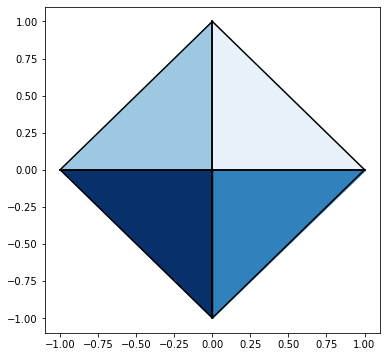

In [70]:
render(octahedron, color_map=matplotlib.cm.get_cmap('Blues'), lines=black)

In [71]:
def split(face):
    midpoints = [unit(add(face[i], face[(i+1)%len(face)])) for i in range(0,len(face))]
    triangles = [(face[i], midpoints[i], midpoints[(i-1)%len(face)]) for i in range(0,len(face))]
    return [midpoints] + triangles

def rec_split(faces, depth=0):
    if depth == 0:
        return faces
    else:
        return rec_split([new_face for face in faces for new_face in split(face)], depth-1)

# NICE SPHERE!
def sphere_approx(n):
    return rec_split(octahedron,n)

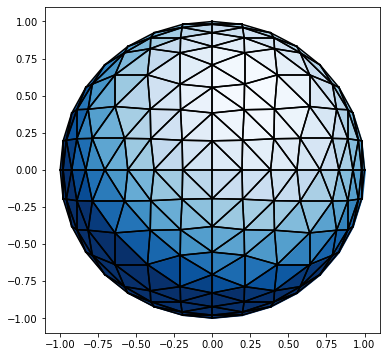

In [72]:
render(sphere_approx(3), lines='k')

### 3.5.4 연습문제

### 연습문제 3.27 (Mini-project)
#### 8면체를 이루는 12개의 변을 정의하는 벡터 쌍을 파이썬으로 구해서 그려라.

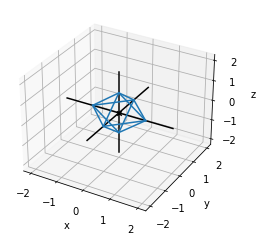

In [73]:
top = (0,0,1)
bottom = (0,0,-1)
xy_plane = [(1,0,0),(0,1,0),(-1,0,0),(0,-1,0)]
edges = [Segment3D(top,p) for p in xy_plane] +\
            [Segment3D(bottom, p) for p in xy_plane] +\
            [Segment3D(xy_plane[i],xy_plane[(i+1)%4]) for i in range(0,4)] 
draw3d(*edges)

### 연습문제 3.28
#### 본문에서 정의한 8면체의 면 중 첫 번째 면은 [(1,0,0),(0,1,0),(0,0,1)]이다. 이 순서는 첫번째 면을 정의하는 벡터를 나열하는 유일한 방법인가?

#### 그렇지 않다. 예를 들어 [(0,1,0),(0,0,1),(1,0,0)]도 동일한 세 개의 점의 집합이며, 이 순서로 나열하면 외적 또한 같은 방향을 가리킨다